#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

('train data:', 'images:', (50000, 32, 32, 3), ' labels:', (50000, 1))
('test  data:', 'images:', (10000, 32, 32, 3), ' labels:', (10000, 1))


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 39s 1ms/step - loss: 1.5560 - acc: 0.4417 - val_loss: 1.3270 - val_acc: 0.5716
Epoch 2/12
37500/37500 [==============================] - 37s 993us/step - loss: 1.1625 - acc: 0.5880 - val_loss: 1.1576 - val_acc: 0.6345
Epoch 3/12
37500/37500 [==============================] - 37s 989us/step - loss: 1.0074 - acc: 0.6467 - val_loss: 1.0345 - val_acc: 0.6703
Epoch 4/12
37500/37500 [==============================] - 37s 994us/step - loss: 0.8938 - acc: 0.6826 - val_loss: 1.0043 - val_acc: 0.6606
Epoch 5/12
37500/37500 [==============================] - 37s 996us/step - loss: 0.8053 - acc: 0.7181 - val_loss: 0.9110 - val_acc: 0.7081
Epoch 6/12
37500/37500 [==============================] - 37s 995us/step - loss: 0.7181 - acc: 0.7491 - val_loss: 0.8766 - val_acc: 0.7041
Epoch 7/12
37500/37500 [==============================] - 37s 985us/st

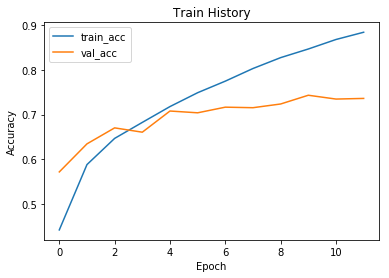

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#繪圖
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

## MSE

In [24]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [25]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])



#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 38s 1ms/step - loss: 0.0734 - acc: 0.3926 - val_loss: 0.0663 - val_acc: 0.5068
Epoch 2/12
37500/37500 [==============================] - 36s 969us/step - loss: 0.0603 - acc: 0.5314 - val_loss: 0.0591 - val_acc: 0.5788
Epoch 3/12
37500/37500 [==============================] - 36s 968us/step - loss: 0.0540 - acc: 0.5915 - val_loss: 0.0548 - val_acc: 0.6002
Epoch 4/12
37500/37500 [==============================] - 36s 972us/step - loss: 0.0494 - acc: 0.6329 - val_loss: 0.0510 - val_acc: 0.6294
Epoch 5/12
37500/37500 [==============================] - 37s 974us/step - loss: 0.0451 - acc: 0.6669 - val_loss: 0.0468 - val_acc: 0.6727
Epoch 6/12
37500/37500 [==============================] - 36s 973us/step - loss: 0.0416 - acc: 0.6980 - val_loss: 0.0462 - val_acc: 0.6678
Epoch 7/12
37500/37500 [==============================] - 36s 964us/step - loss: 0.0383 - acc: 0.7255 - val_loss: 0.04

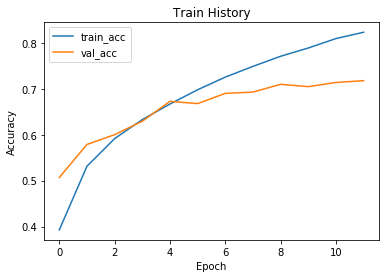

In [26]:
#繪圖
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()      